Dosyalarımızı Colaba aktaralım

In [1]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving diabetes.csv to diabetes.csv
User uploaded file "diabetes.csv" with length 26820 bytes


Veri kümesi ve sorunun türü klasik denetimli bir ikili sınıflandırmadır. Hepsi belirli özelliklere (özelliklere) sahip bir dizi unsur göz önüne alındığında, tip 2 diyabetten etkilenen insanları tanımlamak için bir makine öğrenme modeli oluşturmak istiyoruz.

Sorunu çözmek için, verileri analiz etmemiz, gerekli herhangi bir dönüşümü ve normalizasyonu yapmamız, bir makine öğrenme algoritması uygulamak, bir model eğitmek, eğitilmiş modelin performansını kontrol etmek ve türümüz için en yüksek performansı bulana kadar diğer algoritmalar ile tekrarlamak zorundayız. veri kümesi.

In [2]:
import os
import pandas as pd
import numpy as np

In [19]:
# We read the data from the CSV file
# data_path = os.path.join(DATASET_PATH, 'diabetes.csv')
dataset = pd.read_csv("/content/diabetes.csv")

# Because thr CSV doesn't contain any header, we add column names 
# using the description from the original dataset website



In [20]:
dataset.shape
dataset

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [21]:
dataset.columns

Index(['Number of times pregnant',
       'Plasma glucose concentration a 2 hours in an oral glucose tolerance test',
       'Diastolic blood pressure (mm Hg)', 'Triceps skin fold thickness (mm)',
       '2-Hour serum insulin (mu U/ml)',
       'Body mass index (weight in kg/(height in m)^2)',
       'Diabetes pedigree function', 'Age (years)', 'Class variable'],
      dtype='object')

In [22]:
dataset.columns = ["pregnant","glukoz","bloodP","triceps","insulin","BMI","prdigree","age","target"]

In [23]:
dataset.shape
dataset

,pregnant,glukoz,bloodP,triceps,insulin,BMI,prdigree,age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [24]:
corr = dataset.corr()
corr

,pregnant,glukoz,bloodP,triceps,insulin,BMI,prdigree,age,target
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glukoz,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
bloodP,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
triceps,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
prdigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
target,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Korelasyon matrisi, farklı özellikler arasındaki korelasyonu anlamak için önemli bir araçtır. Değerler -1 ile 1 arasında değişir ve bir değer ne kadar yakınsa, iki özellik arasında daha iyi korelasyon vardır. Veri setimiz için korelasyon matrisini hesaplayalım.

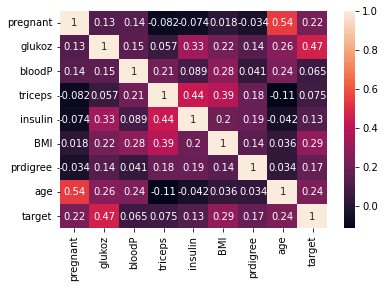

In [25]:
%matplotlib inline
import seaborn as sns
sns.heatmap(corr,annot=True)

Verileri görselleştirmek, veri analizinin önemli bir adımıdır. Verilerin grafiksel görselleştirilmesiyle, çeşitli özellik değerleri dağılımını daha iyi anlıyoruz: örneğin, insanların ortalama yaşı veya ortalama BMI vb.

Elbette incelememizi tablo görselleştirmesiyle sınırlayabiliriz, ancak model hassasiyetimizi etkileyebilecek önemli şeyleri kaçırabiliriz.

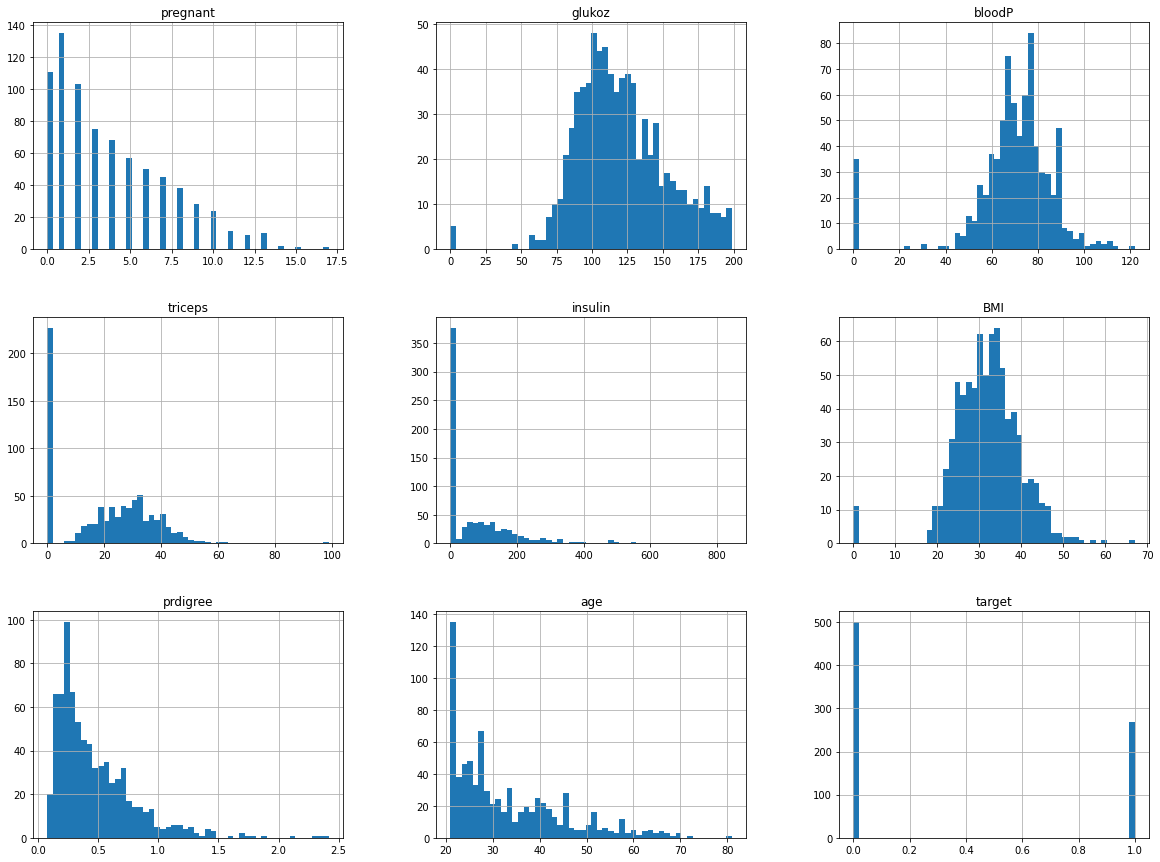

In [26]:
import matplotlib.pyplot as plt
dataset.hist(bins=50, figsize=(20, 15))
plt.show()

Veri kümesinde fark ettiğim önemli bir şey (ve başlangıçta açık değildi), bazı insanların bazı özellikler için null (sıfır) değerlere sahip olması: BMI veya kan için 0 olması mümkün değildir. basınç.


Benzer değerlerle nasıl başa çıkabiliriz? Veri dönüştürme aşamasında daha sonra göreceğiz.

In [ ]:
# # Calculate the median value for BMI
# median_bmi = dataset['BMI'].median()
# # Substitute it in the BMI column of the
# # dataset where values are 0
# dataset['BMI'] = dataset['BMI'].replace(
#     to_replace=0, value=median_bmi)

In [ ]:
# # Calculate the median value for BloodP
# median_bloodp = dataset['BloodP'].median()
# # Substitute it in the BloodP column of the
# # dataset where values are 0
# dataset['BloodP'] = dataset['BloodP'].replace(
#     to_replace=0, value=median_bloodp)

In [ ]:
# # Calculate the median value for PlGlcConc
# median_plglcconc = dataset['PlGlcConc'].median()
# # Substitute it in the PlGlcConc column of the
# # dataset where values are 0
# dataset['PlGlcConc'] = dataset['PlGlcConc'].replace(
#     to_replace=0, value=median_plglcconc)

In [ ]:
# # Calculate the median value for SkinThick
# median_skinthick = dataset['SkinThick'].median()
# # Substitute it in the SkinThick column of the
# # dataset where values are 0
# dataset['SkinThick'] = dataset['SkinThick'].replace(
#     to_replace=0, value=median_skinthick)

In [ ]:
# # Calculate the median value for TwoHourSerIns
# median_twohourserins = dataset['TwoHourSerIns'].median()
# # Substitute it in the TwoHourSerIns column of the
# # dataset where values are 0
# dataset['TwoHourSerIns'] = dataset['TwoHourSerIns'].replace(
#     to_replace=0, value=median_twohourserins)

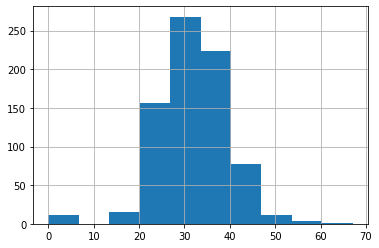

In [27]:
dataset["BMI"].hist()

In [28]:
mean_bmi = dataset["BMI"].mean()
dataset["BMI"] =  dataset["BMI"].replace(to_replace=0,value=mean_bmi)

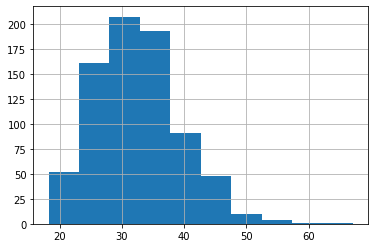

In [29]:
dataset["BMI"].hist()

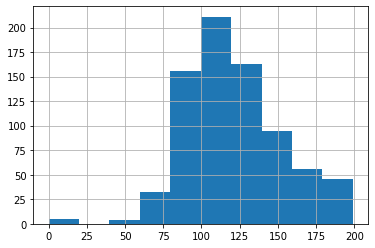

In [30]:
dataset["glukoz"].hist()

In [31]:
mean_bmi = dataset["glukoz"].mean()
dataset["glukoz"] =  dataset["glukoz"].replace(to_replace=0,value=mean_bmi)

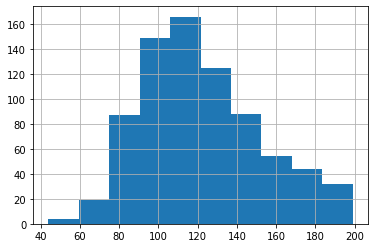

In [32]:
dataset["glukoz"].hist()

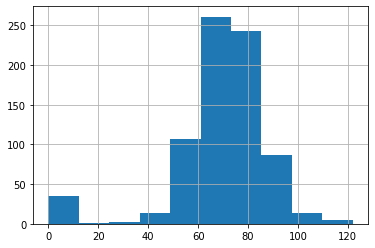

In [33]:
dataset["bloodP"].hist()

In [34]:
mean_bmi = dataset["bloodP"].mean()
dataset["bloodP"] =  dataset["bloodP"].replace(to_replace=0,value=mean_bmi)

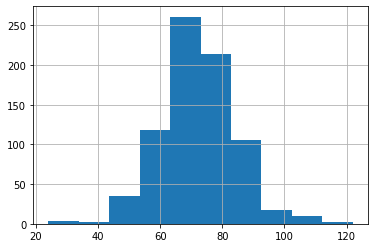

In [35]:
dataset["bloodP"].hist()

In [36]:
df = dataset.drop(["insulin","triceps"],axis=1)

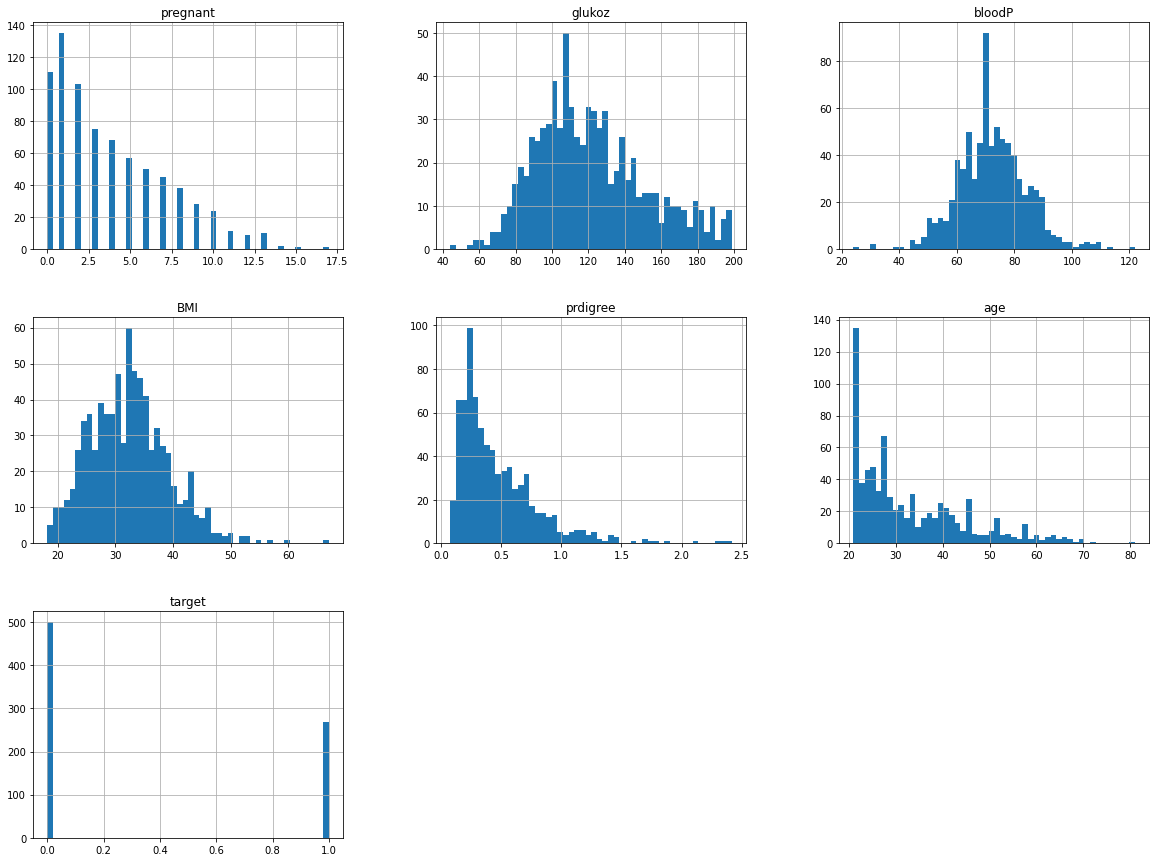

In [37]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [38]:
corr = df.corr()
corr

,pregnant,glukoz,bloodP,BMI,prdigree,age,target
pregnant,1.000000,0.127964,0.208984,0.021546,-0.033523,0.544341,0.221898
glukoz,0.127964,1.000000,0.219666,0.231478,0.137106,0.266600,0.492908
bloodP,0.208984,0.219666,1.000000,0.281231,0.000371,0.326740,0.162986
BMI,0.021546,0.231478,0.281231,1.000000,0.153508,0.025748,0.312254
prdigree,-0.033523,0.137106,0.000371,0.153508,1.000000,0.033561,0.173844
age,0.544341,0.266600,0.326740,0.025748,0.033561,1.000000,0.238356
target,0.221898,0.492908,0.162986,0.312254,0.173844,0.238356,1.000000


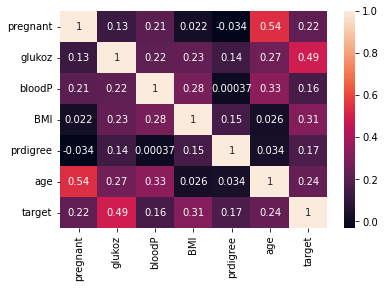

In [39]:
%matplotlib inline
import seaborn as sns
sns.heatmap(corr,annot=True)

Şimdi verileri dönüştürdüğümüze göre, veri kümesini iki bölüme ayırmalıyız: bir eğitim veri kümesi ve bir test veri kümesi. Veri kümesini bölmek, denetimli makine öğrenimi modelleri için çok önemli bir adımdır. Temel olarak, modeli eğitmek için ilk kısmı kullanacağız (önceden atanmış etiketle sütunu yok saymak), daha sonra eğitilmiş modeli yeni verilerle ilgili tahminler yapmak için kullanacağız (test veri seti, eğitim setinin bir parçası değil) ve öngörülen değeri önceden atanmış etiketle karşılaştırın.

In [40]:
# Split the training dataset in 80% / 20%
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(
    df, test_size=0.2, random_state=42)

In [41]:
# Separate labels from the rest of the dataset
train_set_labels = train_set["target"].copy()
train_set = train_set.drop("target", axis=1)

test_set_labels = test_set["target"].copy()
test_set = test_set.drop("target", axis=1)

Uygulamamız gereken en önemli veri dönüşümlerinden biri özellik ölçeklendirmesidir. Temelde, makine farklı bir değer kümesine sahipse, makine öğrenme algoritmalarının çoğu iyi çalışmaz. Örneğin, olgumuzda Yaş 20 ila 80 yaş arasında değişirken, bir hastanın gebe kalma sayısı 0 ila 17 arasında değişmektedir. Bu nedenle uygun bir dönüşüm uygulamalıyız.

In [42]:
# Apply a scaler
from sklearn.preprocessing import StandardScaler as Scaler

scaler = Scaler()
scaler.fit(train_set)
train_set_scaled = scaler.transform(train_set)
test_set_scaled = scaler.transform(test_set)

In [43]:
df = pd.DataFrame(data=train_set_scaled)
df.head()

,0,1,2,3,4,5
0,-0.526397,-1.258063,-0.248752,-0.051306,-0.490735,-1.035940
1,1.588046,-0.327138,0.816509,-0.598577,2.415030,1.487101
2,-0.828460,0.570539,-2.157573,-0.526427,0.549161,-0.948939
3,-1.130523,1.301980,-1.827119,-1.507672,-0.639291,2.792122
4,0.681856,0.404303,0.651283,1.998836,-0.686829,1.139095


Veri setimizle hangi algoritmanın daha iyi çalışacağını önceden bilmek mümkün değildir. Birkaçını karşılaştırmalı ve "en iyi skor" a sahip olanı seçmeliyiz.

To compare multiple algorithms with the same dataset, there is a very nice utility in sklearn called model_selection. We create a list of algorithms and then we score them using the same comparison method. At the end we pick the one with the best score.

In [44]:
# Import all the algorithms we want to test
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor

In [45]:
# Import the slearn utility to compare algorithms
from sklearn import model_selection

In [46]:
# Prepare an array with all the algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC()))
models.append(('LSVC', LinearSVC()))
models.append(('RFC', RandomForestClassifier()))
models.append(('DTR', DecisionTreeRegressor()))

In [71]:
# Prepare the configuration to run the test
seed = 7
results = []
names = []
X = train_set_scaled
Y = train_set_labels

In [72]:
# Every algorithm is tested and results are
# collected and printed
for name, model in models:
    kfold = model_selection.KFold(shuffle=True,
        n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(
        model, X, Y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (
        name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.765547 (0.029567)
KNN: 0.736145 (0.018872)
NB: 0.739424 (0.033340)
SVC: 0.749180 (0.028484)


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

LSVC: 0.760656 (0.031260)
RFC: 0.752591 (0.040247)
DTR: 0.731571 (0.055414)


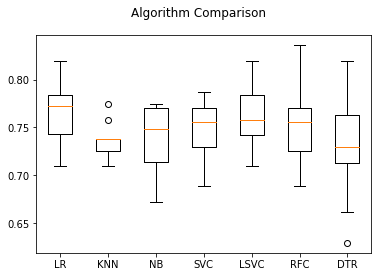

In [73]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Algoritmanın varsayılan parametreleri, veri setimiz için nadiren en iyi parametrelerdir. Sklearn kullanarak kolayca bir parametre ızgarası oluşturabilir ve tüm olası kombinasyonları deneyebiliriz. Sonunda best_estimator_ özelliğini inceliyoruz ve veri setimiz için en iyisini elde ediyoruz.

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

param_grid = {
    'C': [1.0, 10.0, 50.0],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'shrinking': [True, False],
    'gamma': ['auto', 1, 0.1],
    'coef0': [0.0, 0.1, 0.5]
}

model_svc = SVC()

grid_search = RandomizedSearchCV(
    model_svc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(train_set_scaled, train_set_labels)

In [ ]:
grid_search.best_score_

0.9926829268292682

In [ ]:
svc = grid_search.best_estimator_

In [ ]:
predictions =  svc.predict(test_set_scaled)

In [ ]:
from sklearn import metrics
confMatrix = metrics.confusion_matrix(test_set_labels,predictions)
import seaborn as sns
sns.heatmap(confMatrix,annot=True)

In [ ]:
# Create an instance of the algorithm using parameters
# from best_estimator_ property
svc = grid_search.best_estimator_

# Use the whole dataset to train the model
X = np.append(train_set_scaled, test_set_scaled, axis=0)
Y = np.append(train_set_labels, test_set_labels, axis=0)

# Train the model
svc.fit(X, Y)

SVC(C=50.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# We create a new (fake) person having the three most correated values high

new_df = pd.DataFrame([[52,1,0,125,212,0,1,168,0,1.0,2,2,3]])
# We scale those values like the others
new_df_scaled = scaler.transform(new_df)

In [ ]:
# We predict the outcome
prediction = svc.predict(new_df_scaled)

In [ ]:
# A value of "1" means that this person is likley to have type 2 diabetes
prediction

array([0])

In [ ]:
import pickle
import dlib


In [ ]:
pickle.dump(svc,open("/content/mlmodel1.pkl","wb"))
pickle.dump(scaler,open("/content/olcek.pkl","wb"))

Sonunda SVC algoritması ve parametre optimizasyonu kullanarak% 76'lık bir puan bulduk. Farklı veri dönüşümlerini denemek veya henüz test edilmemiş algoritmaları denemek gibi daha fazla analiz ve optimizasyon için hala yer olabileceğini lütfen unutmayın. Bir kez daha belirli bir veri kümesindeki bir problemi çözmek için bir makine öğrenimi modeli eğitiminin bir deneme / başarısız / geliştirme süreci olduğunu tekrarlamak istiyorum.

7
